Import necessary libraries

In [21]:
!pip install pingouin==0.5.0
!pip install bioinfokit

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
res=stat()
from pingouin import ancova


##Cleaning dataset

1.1: Visualize dataset


In [3]:
data = pd.read_csv(r'C:\Users\Adrian\Python\diabetes (2).csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

1.2: Replace 0 with missing
For "missing" values of 0 in Glucose, BloodPressure, SkinThickness, Insulin, and BMI replace with NaN 


In [55]:
data["Glucose"] = data["Glucose"].apply(lambda x: np.NaN if x == 0 else x)
data["BloodPressure"] = data["BloodPressure"].apply(lambda x: np.NaN if x == 0 else x)
data["SkinThickness"] = data["SkinThickness"].apply(lambda x: np.NaN if x == 0 else x)
data["Insulin"] = data["Insulin"].apply(lambda x: np.NaN if x == 0 else x)
data["BMI"] = data["BMI"].apply(lambda x: np.NaN if x == 0 else x)

data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

##Exploratory Data Analysis

2.1: First view overall summary statistics of columns


In [56]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

2.2: View data for groups who have diabetes and who do not have diabetes





In [57]:
datatrue = data[data.Outcome==1]
datatrue.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  266.000000     252.000000     180.000000  130.000000   
mean      4.865672  142.319549      75.321429      33.000000  206.846154   
std       3.741239   29.599199      12.299866      10.327595  132.699898   
min       0.000000   78.000000      30.000000       7.000000   14.000000   
25%       1.750000  119.000000      68.000000      27.000000  127.500000   
50%       4.000000  140.000000      74.500000      32.000000  169.500000   
75%       8.000000  167.000000      84.000000      39.000000  239.250000   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  266.000000                268.000000  268.000000    268.0  
mean    35.406767                  0.550500   37.067164      1.0  
std      6.614982                  0.372354   10.968254      0.0  
min     22.900000                  0.088000   21.000000      1.0  
25%     30.900000                  0.262500   28.000000      1.0  
50%     34.300000                  0.449000   36.000000      1.0  
75%     38.925000                  0.728000   44.000000      1.0  
max     67.100000                  2.420000   70.000000      1.0

In [58]:
datafalse=data[data.Outcome==0]
datafalse.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  497.000000     481.000000     361.000000  264.000000   
mean      3.298000  110.643863      70.877339      27.235457  130.287879   
std       3.017185   24.776906      12.161223      10.026491  102.482237   
min       0.000000   44.000000      24.000000       7.000000   15.000000   
25%       1.000000   93.000000      62.000000      19.000000   66.000000   
50%       2.000000  107.000000      70.000000      27.000000  102.500000   
75%       5.000000  125.000000      78.000000      33.000000  161.250000   
max      13.000000  197.000000     122.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  491.000000                500.000000  500.000000    500.0  
mean    30.859674                  0.429734   31.190000      0.0  
std      6.560737                  0.299085   11.667655      0.0  
min     18.200000                  0.078000   21.000000      0.0  
25%     25.600000                  0.229750   23.000000      0.0  
50%     30.100000                  0.336000   27.000000      0.0  
75%     35.300000                  0.561750   37.000000      0.0  
max     57.300000                  2.329000   81.000000      0.0

<AxesSubplot:title={'center':'Age'}, xlabel='Outcome'>

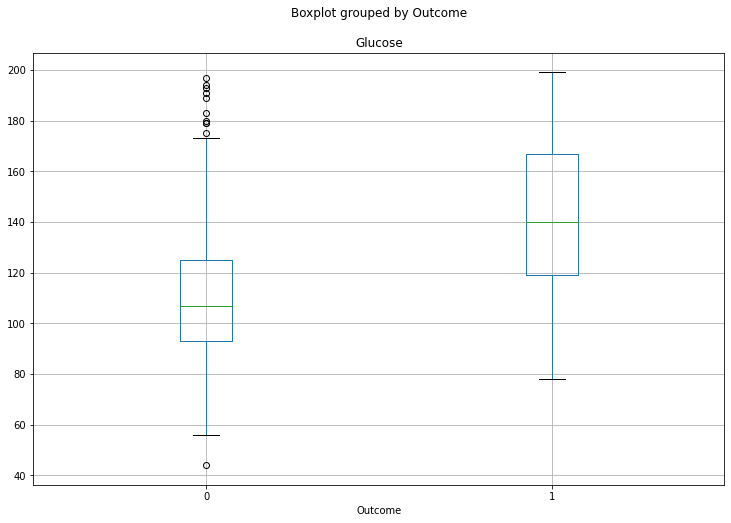

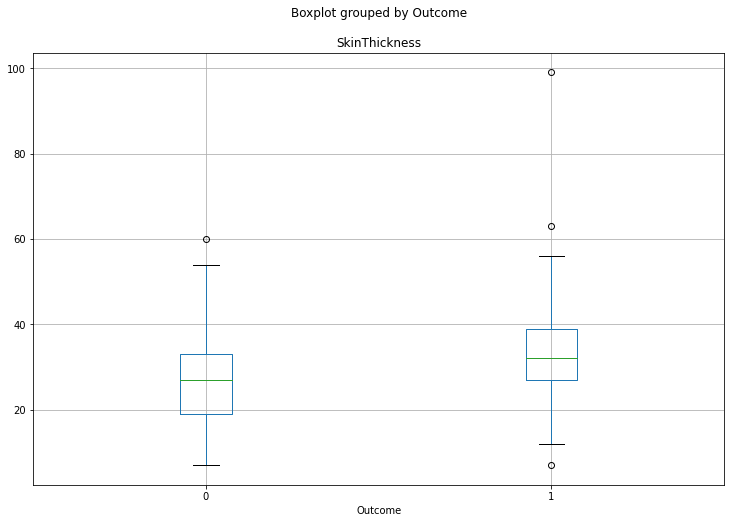

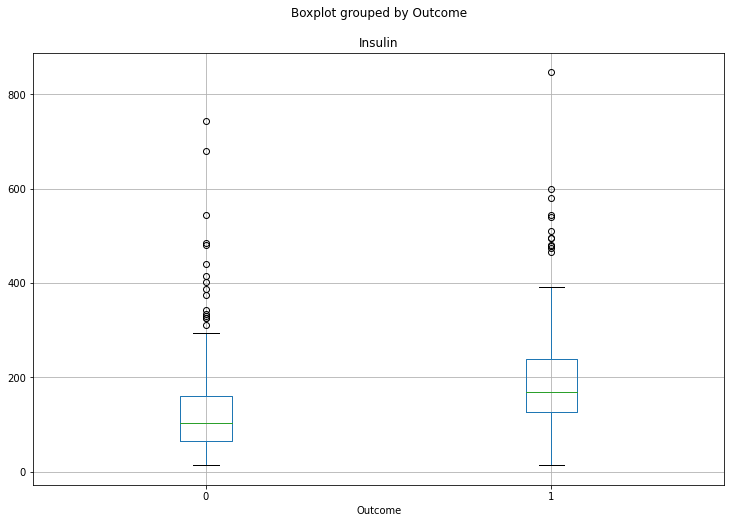

In [59]:
data.boxplot('Pregnancies', by='Outcome', figsize=(12, 8))
data.boxplot('Glucose', by='Outcome', figsize=(12, 8))
data.boxplot('BloodPressure', by='Outcome', figsize=(12, 8))
data.boxplot('SkinThickness', by='Outcome', figsize=(12, 8))
data.boxplot('Insulin', by='Outcome', figsize=(12, 8))
data.boxplot('BMI', by='Outcome', figsize=(12, 8))
data.boxplot('DiabetesPedigreeFunction', by='Outcome', figsize=(12, 8))
data.boxplot('Age', by='Outcome', figsize=(12, 8))


# 2.3: Two-mean t-tests

Text(0.5, 1.0, 'Two-Sample T-test (Glucose)')

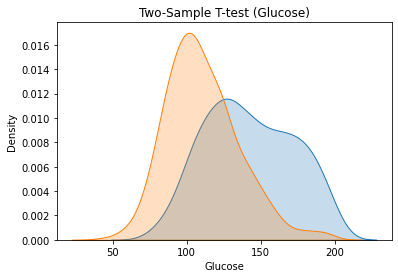

In [60]:
sns.kdeplot(datatrue["Glucose"], shade=True)
sns.kdeplot(datafalse["Glucose"], shade=True)
plt.title("Two-Sample T-test (Glucose)")

Text(0.5, 1.0, 'Two-Sample T-test (Age)')

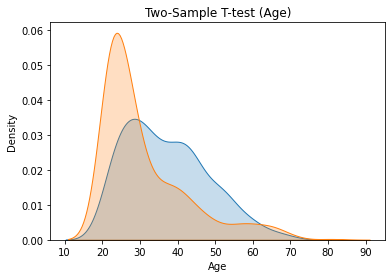

In [61]:
sns.kdeplot(datatrue["Age"], shade=True)
sns.kdeplot(datafalse["Age"], shade=True)
plt.title("Two-Sample T-test (Age)")

In [62]:
sns.kdeplot(datatrue["Insulin"], shade=True)
sns.kdeplot(datafalse["Insulin"], shade=True)
plt.title("Two-Sample T-test (Insulin)")

Text(0.5, 1.0, 'Two-Sample T-test (Insulin)')

In [63]:
tStat, pValue = stats.ttest_ind(datatrue["Pregnancies"], datafalse["Pregnancies"], equal_var=False, nan_policy="omit")
print("Pregnancies P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(datatrue["Glucose"], datafalse["Glucose"], equal_var=False, nan_policy="omit")
print("Glucose P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(datatrue["BloodPressure"], datafalse["BloodPressure"], equal_var=False, nan_policy="omit")
print("BloodPressure P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(datatrue["SkinThickness"], datafalse["SkinThickness"], equal_var=False, nan_policy="omit")
print("SkinThickness P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(datatrue["Insulin"], datafalse["Insulin"], equal_var=False, nan_policy="omit")
print("Insulin P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(datatrue["BMI"], datafalse["BMI"], equal_var=False, nan_policy="omit")
print("BMI P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(datatrue["DiabetesPedigreeFunction"], datafalse["DiabetesPedigreeFunction"], equal_var=False, nan_policy="omit")
print("DiabetesPedigreeFunction P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(datatrue["Age"], datafalse["Age"], equal_var=False, nan_policy="omit")
print("Age P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

Pregnancies P-Value:6.8219256004571456e-09 T-Statistic:5.9069614794974905
Glucose P-Value:2.8439261927746266e-41 T-Statistic:14.884412050496012
BloodPressure P-Value:3.97154463719128e-06 T-Statistic:4.664265117573659
SkinThickness P-Value:1.8255271175007797e-09 T-Statistic:6.176586768994067
Insulin P-Value:2.67211639987615e-08 T-Statistic:5.783322398279952
BMI P-Value:2.4835713809715237e-18 T-Statistic:9.055003741836805
DiabetesPedigreeFunction P-Value:6.1004814242403285e-06 T-Statistic:4.576812008291278
Age P-Value:1.2015125273113395e-11 T-Statistic:6.92073837898804


In [64]:
corrMatrix = datatrue.corr()
print(corrMatrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000 -0.053010       0.140992      -0.102248   
Glucose                     -0.053010  1.000000       0.101319       0.096587   
BloodPressure                0.140992  0.101319       1.000000       0.092068   
SkinThickness               -0.102248  0.096587       0.092068       1.000000   
Insulin                     -0.003336  0.398039      -0.073271       0.051847   
BMI                         -0.131480  0.056638       0.249108       0.515212   
DiabetesPedigreeFunction    -0.069195  0.027343      -0.060649       0.130701   
Age                          0.444987  0.113157       0.286481      -0.065115   
Outcome                           NaN       NaN            NaN            NaN   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.003336 -0.131480                 -0.069195   
Glucose                   0.398039  0.056

2.5: Investigate relationship between age/outcome

<AxesSubplot:xlabel='Age', ylabel='Count'>

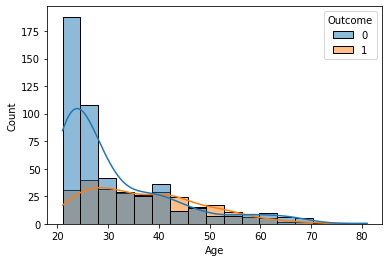

In [65]:
sns.histplot(x="Age", hue="Outcome", data=data, kde=True)


<AxesSubplot:xlabel='Glucose', ylabel='Count'>

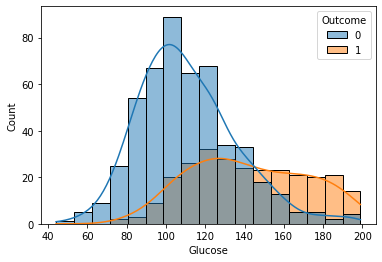

In [66]:
sns.histplot(x="Glucose", hue="Outcome", data=data, kde=True)

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

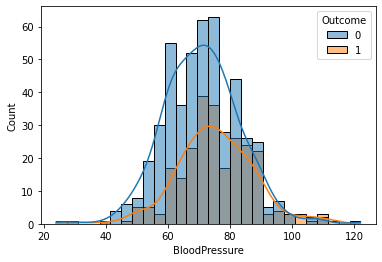

In [67]:
sns.histplot(x="BloodPressure", hue="Outcome", data=data, kde=True)

In [68]:
sns.histplot(x="SkinThickness", hue="Outcome", data=data, kde=True)

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

In [69]:
sns.histplot(x="Insulin", hue="Outcome", data=data, kde=True)

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

<AxesSubplot:xlabel='BMI', ylabel='Count'>

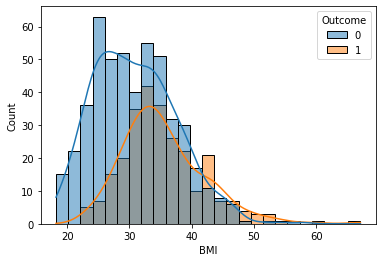

In [70]:
sns.histplot(x="BMI", hue="Outcome", data=data, kde=True)

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

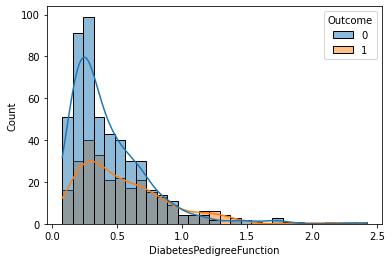

In [71]:
sns.histplot(x="DiabetesPedigreeFunction", hue="Outcome", data=data, kde=True)

# 3.1: Multiple Linear Regression
Run ANOVAs with each variable + post-hoc tests

In [72]:
aovAge=pg.anova(data=data, dv="Age", between="Outcome",detailed=True)
print(aovAge)

    Source             SS   DF           MS          F         p-unc       np2
0  Outcome    6026.695153    1  6026.695153  46.140611  2.209975e-11  0.056814
1   Within  100051.741045  766   130.615850        NaN           NaN       NaN


In [73]:
ptAge=pg.pairwise_tukey(dv="Age",between="Outcome",effsize="Cohen",data=data)
print(ptAge)

   A  B  mean(A)    mean(B)      diff        se         T  p-tukey     Cohen
0  0  1    31.19  37.067164 -5.877164  0.865219 -6.792688    0.001 -0.514245


ANOVA for Insulin

In [74]:
aovInsulin=pg.anova(data=data, dv="Insulin", between="Outcome",detailed=True)
print(aovInsulin)

    Source            SS   DF             MS          F         p-unc  \
0  Outcome  5.105465e+05    1  510546.539467  39.758234  7.754791e-10   
1   Within  5.033781e+06  392   12841.278174        NaN           NaN   

        np2  
0  0.092084  
1       NaN  


In [75]:
ptInsulin=pg.pairwise_tukey(dv="Insulin",between="Outcome",effsize="Cohen",data=data)
print(ptInsulin)

   A  B     mean(A)     mean(B)       diff         se         T  p-tukey  \
0  0  1  130.287879  206.846154 -76.558275  12.141675 -6.305413    0.001   

      Cohen  
0 -0.675597  


ANOVA for BMI

In [76]:
aovBMI=pg.anova(data=data, dv="BMI", between="Outcome",detailed=True)
print(aovBMI)

    Source            SS   DF           MS          F         p-unc       np2
0  Outcome   3567.260963    1  3567.260963  82.395947  9.545638e-19  0.098395
1   Within  32687.069367  755    43.294132        NaN           NaN       NaN


In [77]:
ptBMI=pg.pairwise_tukey(dv="BMI",between="Outcome",effsize="Cohen",data=data)
print(ptBMI)

   A  B    mean(A)    mean(B)      diff        se         T  p-tukey     Cohen
0  0  1  30.859674  35.406767 -4.547093  0.500934 -9.077221    0.001 -0.691066


ANOVA for pregnancies

In [78]:
aovPregnancies=pg.anova(data=data, dv="Pregnancies", between="Outcome",detailed=True)
print(aovPregnancies)

    Source           SS   DF          MS          F         p-unc       np2
0  Outcome   428.799019    1  428.799019  39.670227  5.065127e-10  0.049239
1   Within  8279.762179  766   10.809089        NaN           NaN       NaN


In [79]:
ptPregnancies=pg.pairwise_tukey(dv="Pregnancies",between="Outcome",effsize="Cohen",data=data)
print(ptPregnancies)

   A  B  mean(A)   mean(B)      diff        se         T  p-tukey     Cohen
0  0  1    3.298  4.865672 -1.567672  0.248899 -6.298431    0.001 -0.476827


ANOVA for Glucose

In [80]:
aovGlucose=pg.anova(data=data, dv="Glucose", between="Outcome",detailed=True)
print(aovBMI)

    Source            SS   DF           MS          F         p-unc       np2
0  Outcome   3567.260963    1  3567.260963  82.395947  9.545638e-19  0.098395
1   Within  32687.069367  755    43.294132        NaN           NaN       NaN


In [81]:
ptGlucose=pg.pairwise_tukey(dv="Glucose",between="Outcome",effsize="Cohen",data=data)
print(ptGlucose)

   A  B     mean(A)     mean(B)       diff        se          T  p-tukey  \
0  0  1  110.643863  142.319549 -31.675686  2.017443 -15.700907    0.001   

      Cohen  
0 -1.192801  


ANOVA for BLoodPressure

In [82]:
aovBloodPressure=pg.anova(data=data, dv="BloodPressure", between="Outcome",detailed=True)
print(aovBloodPressure)

    Source             SS   DF           MS          F     p-unc       np2
0  Outcome    3265.933021    1  3265.933021  21.910217  0.000003  0.029101
1   Within  108962.727279  731   149.059818        NaN       NaN       NaN


In [83]:
ptBloodPressure=pg.pairwise_tukey(dv="BloodPressure",between="Outcome",effsize="Cohen",data=data)
print(ptBloodPressure)

   A  B    mean(A)    mean(B)     diff        se         T  p-tukey     Cohen
0  0  1  70.877339  75.321429 -4.44409  0.949422 -4.680835    0.001 -0.364001


ANOVA for SkinThickness

In [84]:
aovSkinThickness=pg.anova(data=data, dv="SkinThickness", between="Outcome",detailed=True)
print(aovSkinThickness)

    Source            SS   DF           MS          F         p-unc       np2
0  Outcome   3991.280024    1  3991.280024  38.914322  8.959949e-10  0.067336
1   Within  55282.986150  539   102.565837        NaN           NaN       NaN


In [85]:
ptSkinThickness=pg.pairwise_tukey(dv="SkinThickness",between="Outcome",effsize="Cohen",data=data)
print(ptSkinThickness)

   A  B    mean(A)  mean(B)      diff        se         T  p-tukey     Cohen
0  0  1  27.235457     33.0 -5.764543  0.924081 -6.238135    0.001 -0.569198


ANOVA for DiabetesPedigreeFunction

In [86]:
aovDiabetesPedigreeFunction=pg.anova(data=data, dv="DiabetesPedigreeFunction", between="Outcome",detailed=True)
print(aovBMI)

    Source            SS   DF           MS          F         p-unc       np2
0  Outcome   3567.260963    1  3567.260963  82.395947  9.545638e-19  0.098395
1   Within  32687.069367  755    43.294132        NaN           NaN       NaN


In [87]:
ptDiabetesPedigreeFunction=pg.pairwise_tukey(dv="DiabetesPedigreeFunction",between="Outcome",effsize="Cohen",data=data)
print(ptDiabetesPedigreeFunction)

   A  B   mean(A)  mean(B)      diff        se         T  p-tukey     Cohen
0  0  1  0.429734   0.5505 -0.120766  0.024718 -4.885826    0.001 -0.369885


# 3.2: Run Two-way ANOVAs

In [88]:
np.seterr(divide='ignore', invalid='ignore')

model = ols('Outcome~C(Age)+C(Glucose) + C(Age):C(Glucose)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table 

C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 51, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 134, but rank is 4
  warnings.warn('covariance of constraints does not have full '
C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6834, but rank is 618
  warnings.warn

sum_sq      df             F    PR(>F)
C(Age)            -1.173722e-09    51.0 -1.766802e-10  1.000000
C(Glucose)        -5.028878e-01   134.0 -2.881104e-02  1.000000
C(Age):C(Glucose)  1.611253e+03  6834.0  1.810012e+00  0.000141
Residual           1.341667e+01   103.0           NaN       NaN

In [89]:
res.anova_stat(df=data, res_var='Outcome',anova_model='Outcome~C(Glucose)+C(BMI)+C(Glucose):C(BMI)')
res.anova_summary

MemoryError: Unable to allocate 8.19 GiB for an array with shape (32964, 33345) and data type float64

In [5]:
model=ols('Outcome~C(BMI)+C(Age) + C(BMI):C(Age)',data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 246, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:1900: RuntimeWarning: invalid value encountered in true_divide
  F /= J
C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 51, but rank is 0
  warnings.warn('covariance of constraints does not have full '


KeyboardInterrupt: 

# Interaction Plots

In [93]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['Outcome'], trace=data['Age'], response=data['Glucose'])

plt.show()

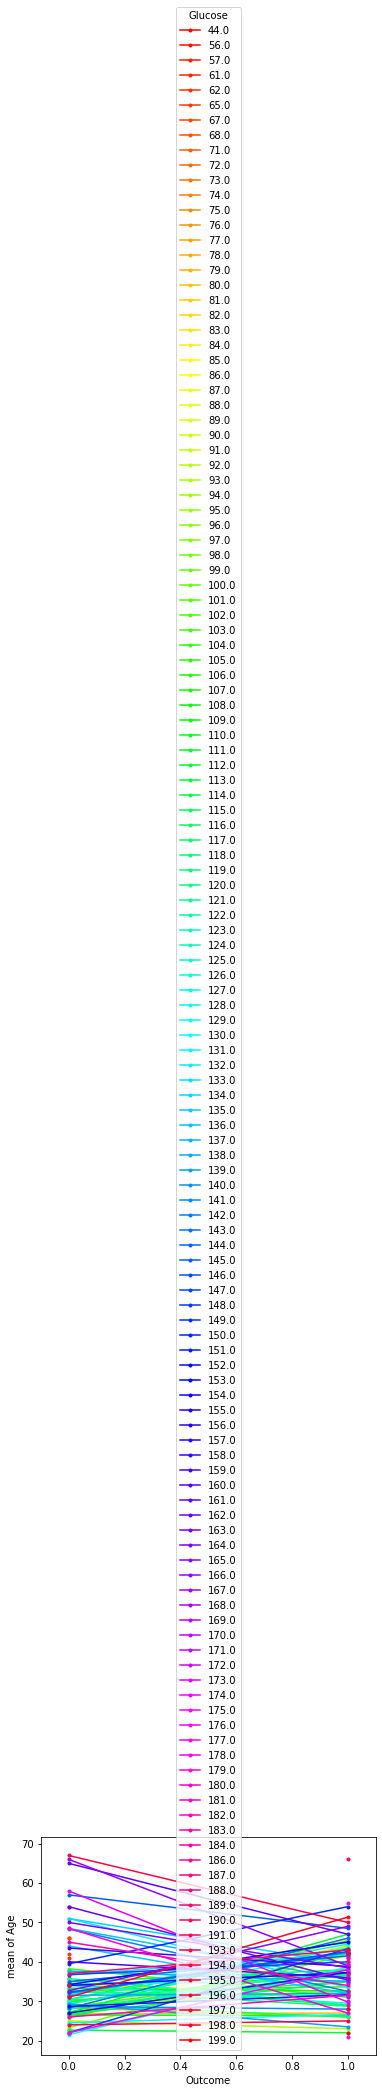

In [95]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['Outcome'], trace=data['Glucose'], response=data['Age'])

plt.show()

# 3.3 Confidence Intervals

In [98]:
res.tukey_hsd(df=data, res_var='Outcome', xfac_var='Age',anova_model='Outcome ~ C(Glucose) + C(Age) + C(Glucose):C(Age)')
res.tukey_summary

C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 116, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4872, but rank is 330
  warnings.warn

group1  group2      Diff     Lower     Upper   q-value   p-value
0        21      33  0.575758  0.095707  1.055808  7.246316  0.005314
1        21      26  0.147727 -0.222177  0.517631  2.412884  0.900000
2        21      53  0.939394  0.107922  1.770866  6.825975  0.011990
3        21      59  0.939394 -0.460182  2.338970  4.055234  0.633622
4        21      51  0.772727  0.160780  1.384674  7.629167  0.002482
..      ...     ...       ...       ...       ...       ...       ...
898      81      52  1.000000 -0.688728  2.688728  3.577709  0.828057
899      81      63  0.000000 -1.949975  1.949975  0.000000  0.900000
900      50      52  0.500000 -0.878840  1.878840  2.190890  0.900000
901      50      63  0.500000 -1.188728  2.188728  1.788854  0.900000
902      52      63  1.000000 -0.688728  2.688728  3.577709  0.828057

[903 rows x 7 columns]

In [7]:
res.tukey_hsd(df=data, res_var='Outcome', xfac_var='Age',anova_model='Outcome ~ C(BMI) + C(Age) + C(Age):C(BMI)')
res.tukey_summary

C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 246, but rank is 4
  warnings.warn('covariance of constraints does not have full '
C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 51, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:1900: RuntimeWarning: invalid value encountered in true_divide
  F /= J
C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.P

group1  group2      Diff     Lower     Upper   q-value   p-value
0         50      31  0.083333 -0.626205  0.792872  0.702515  0.900000
1         50      32  0.062500 -0.690079  0.815079  0.496753  0.900000
2         50      21  0.545635 -0.106692  1.197962  5.003219  0.273017
3         50      33  0.036765 -0.708400  0.781929  0.295115  0.900000
4         50      30  0.339286 -0.382812  1.061384  2.810493  0.900000
...      ...     ...       ...       ...       ...       ...       ...
1321      81      70  1.000000 -1.457914  3.457914  2.433584  0.900000
1322      81      68  0.000000 -2.457914  2.457914  0.000000  0.900000
1323      64      70  1.000000 -1.457914  3.457914  2.433584  0.900000
1324      64      68  0.000000 -2.457914  2.457914  0.000000  0.900000
1325      70      68  1.000000 -1.457914  3.457914  2.433584  0.900000

[1326 rows x 7 columns]

In [8]:
res.tukey_hsd(df=data, res_var='Outcome', xfac_var='BMI',anova_model='Outcome ~ C(BMI) + C(Glucose) + C(Glucose):C(BMI)')
res.tukey_summary

MemoryError: Unable to allocate 8.25 GiB for an array with shape (33210, 33345) and data type float64

# 3.4 Graphing + Parameter Est.

In [13]:
data.plot(x='Age', y='Glucose', style='o')
plt.title('Age vs Glucose')
plt.xlabel('Age Studies')
plt.ylabel('Glucose Score')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X = data.loc[:, data[1:]]
y = data.loc[:, data[:1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

df = pd.data({'Actual':y_test, 'Predicted':y_pred})
df


ValueError: Cannot index with multidimensional key

In [24]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

NameError: name 'y_pred' is not defined

# 3.5 ANCOVA

In [27]:
from pingouin import ancova
ancova(data=data,dv='Outcome',covar='Age',between='Glucose')

Source          SS   DF         F         p-unc       np2
0   Glucose   52.913889  134  2.235185  3.761396e-11  0.321535
1       Age    1.710582    1  9.682613  1.944078e-03  0.015089
2  Residual  111.652493  632       NaN           NaN       NaN

In [28]:
ancova(data=data,dv='Outcome',covar='Glucose',between='Age')

Source          SS   DF           F         p-unc       np2
0       Age   21.854575   51    2.778944  2.481479e-09  0.165428
1   Glucose   32.205046    1  208.848595  1.017638e-41  0.226064
2  Residual  110.255030  715         NaN           NaN       NaN

In [29]:
ancova(data=data,dv='Outcome',covar='Glucose',between='BMI')

Source         SS   DF           F         p-unc       np2
0       BMI  45.156361  246    1.097745  1.923545e-01  0.341810
1   Glucose  22.688819    1  135.684249  5.045615e-28  0.206935
2  Residual  86.953245  520         NaN           NaN       NaN

In [30]:
ancova(data=data,dv='Outcome',covar='BMI',between='Glucose')

Source          SS   DF          F         p-unc       np2
0   Glucose   51.089477  134   2.265122  1.735886e-11  0.324444
1       BMI    6.985009    1  41.498456  2.338409e-10  0.061616
2  Residual  106.378066  632        NaN           NaN       NaN

In [31]:
ancova(data=data,dv='Outcome',covar='BMI',between='Age')

Source          SS   DF          F         p-unc       np2
0       Age   26.330963   51   2.815002  1.490809e-09  0.167215
1       BMI   11.323496    1  61.739447  1.441143e-14  0.079485
2  Residual  131.136580  715        NaN           NaN       NaN

In [32]:
ancova(data=data,dv='Outcome',covar='Age',between='BMI')

Source          SS   DF          F         p-unc       np2
0       BMI   61.858727  246   1.273111  1.229782e-02  0.375889
1       Age    6.934409    1  35.108316  5.679605e-09  0.063246
2  Residual  102.707654  520        NaN           NaN       NaN

# 3.6: Test Assumptions

In [70]:
df_melt = pd.melt(data.reset_index(),value_vars=['BMI','Age','Glucose'])

In [75]:
df_melt.columns = ['BMI','Outcome']

C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 74.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


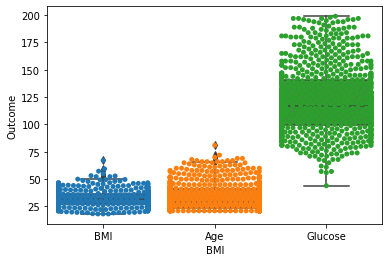

In [76]:
ax = sns.boxplot(x='BMI', y='Outcome',data=df_melt)
ax = sns.swarmplot(x='BMI', y='Outcome',data=df_melt)
plt.show()

In [47]:
model = ols('Outcome ~ C(BMI)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df            F  PR(>F)
C(BMI)    4.038526e+06     2.0  5447.343929     0.0
Residual  8.529523e+05  2301.0          NaN     NaN

In [52]:
res = stat()
res.anova_stat(df=df_melt,res_var='Outcome',anova_model='Outcome ~ C(BMI)')
res.anova_summary 

df        sum_sq       mean_sq            F  PR(>F)
C(BMI)       2.0  4.038526e+06  2.019263e+06  5447.343929     0.0
Residual  2301.0  8.529523e+05  3.706877e+02          NaN     NaN

In [53]:
res = stat()
res.tukey_hsd(df=df_melt, res_var='Outcome', xfac_var='BMI', anova_model='Outcome ~ C(BMI)')
res.tukey_summary

C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1   group2       Diff      Lower      Upper     q-value   p-value
0    BMI      Age   0.789974  -1.514259   3.094207    1.137076  0.683656
1    BMI  Glucose  89.205339  86.901105  91.509572  128.400702  0.001000
2    Age  Glucose  88.415365  86.111131  90.719598  127.263626  0.001000

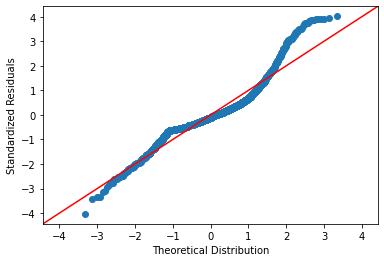

In [54]:
sm.qqplot(res.anova_std_residuals,line='45')
plt.xlabel("Theoretical Distribution")
plt.ylabel("Standardized Residuals")
plt.show()

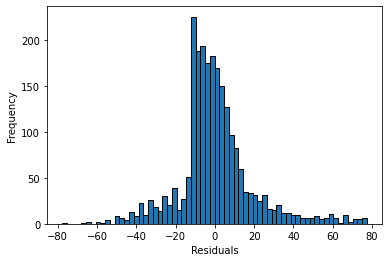

In [55]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [57]:
res = stat()
res.levene(df=df_melt,res_var='Outcome',xfac_var='BMI')
res.levene_summary

Parameter     Value
0      Test statistics (W)  507.0477
1  Degrees of freedom (Df)    2.0000
2                  p value    0.0000

In [61]:
df_melt.columns = ['Age', 'Outcome']

In [62]:
res = stat()
res.levene(df=df_melt,res_var='Outcome',xfac_var='Age')
res.levene_summary

Parameter     Value
0      Test statistics (W)  507.0477
1  Degrees of freedom (Df)    2.0000
2                  p value    0.0000

In [ ]:
res = stat()
res.levene(df=df_melt,res_var='Outcome',xfac_var='Glucose')
res.levene_summary

# 4.1 Power Analysis 

In [86]:
from statsmodels.stats.power import TTestIndPower

def powertest(effect_size,sig,power):
    power_analysis = TTestIndPower()
    sample_size = power_analysis.solve_power(effect_size = effect_size, power = power, alpha = sig)
    print(f'Required sample size: {sample_size} for effect size={effect_size}, power={power}, sig={sig}')
    
powertest(0.8,0.05,0.8)
powertest(0.8,0.02,0.8)
powertest(0.8,0.01,0.8)

powertest(0.2,0.05,0.8)
powertest(0.2,0.02,0.8)
powertest(0.2,0.01,0.8)

powertest(0.8,0.05,0.95)
powertest(0.8,0.02,0.95)
powertest(0.8,0.01,0.95)

powertest(0.2,0.05,0.95)
powertest(0.2,0.02,0.95)
powertest(0.2,0.01,0.95)



Required sample size: 25.524572500479415 for effect size=0.8, power=0.8, sig=0.05
Required sample size: 32.750624042215904 for effect size=0.8, power=0.8, sig=0.02
Required sample size: 38.18831320453632 for effect size=0.8, power=0.8, sig=0.01
Required sample size: 393.4056989990351 for effect size=0.2, power=0.8, sig=0.05
Required sample size: 503.1566218568398 for effect size=0.2, power=0.8, sig=0.02
Required sample size: 585.609280111476 for effect size=0.2, power=0.8, sig=0.01
Required sample size: 41.59412975409231 for effect size=0.8, power=0.95, sig=0.05
Required sample size: 50.662415639472236 for effect size=0.8, power=0.95, sig=0.02
Required sample size: 57.354872586004696 for effect size=0.8, power=0.95, sig=0.01
Required sample size: 650.6974252102957 for effect size=0.2, power=0.95, sig=0.05
Required sample size: 789.8768097948837 for effect size=0.2, power=0.95, sig=0.02
Required sample size: 892.3687367762312 for effect size=0.2, power=0.95, sig=0.01
